<a href="https://colab.research.google.com/github/okonp07/Optimizing-Euro-Stoxx-50-Investments/blob/main/Optimizing_Euro_Stoxx_50_Investments_A_UCB_Algorithm_Based_Stock_Selection_Strategy_with_Correlation_Driven_Hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Optimizing Euro Stoxx 50 Investments: A UCB Algorithm-Based Stock Selection Strategy with Correlation-Driven Hedging

Authors | **Okon Prince | Frackson Makwangwala | Elizabeth Ajabor**


---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed
from numpy.random import rand
import yfinance as yf
import pandas as pd

# Euro Stoxx 50 Portfolio Optimization and Hedging Strategy

Welcome to the Euro Stoxx 50 Portfolio Optimization and Hedging Strategy project! In this notebook, we will explore an optimal investment strategy for the Euro Stoxx 50, a prominent European stock market index. Our goal is to use data analysis and quantitative techniques to make informed investment decisions and hedge our portfolio effectively.

## Project Overview

The Euro Stoxx 50 represents the performance of the top 50 blue-chip stocks from various Eurozone countries. Investing in such a diverse portfolio can be challenging, but by leveraging data-driven strategies, we aim to identify the most promising stocks for investment and use a robust hedging approach to manage risk.

## Key Steps in the Project

1. **Data Collection:** We will start by collecting historical stock price data for the Euro Stoxx 50 components. This data will serve as the foundation for our analysis.

2. **Portfolio Selection:** Using the UCB (Upper Confidence Bound) algorithm, we will identify the five optimum stocks for trading. These stocks will form the core of our portfolio.

3. **Correlation Analysis:** To minimize risk, we will conduct a correlation analysis of the remaining stocks in the Euro Stoxx 50. This analysis will help us identify the least correlated stock to our portfolio.

4. **Hedging Strategy:** With the least correlated stock identified, we will develop a hedging strategy to protect our portfolio against market fluctuations.

5. **Performance Evaluation:** We will assess the performance of our portfolio and hedging strategy, considering factors such as returns, risk, and volatility.

## Why This Project Matters

In today's dynamic financial markets, making informed investment decisions is crucial. This project combines data analysis and quantitative methods to optimize your investment strategy. Whether you're a seasoned investor or just starting in the world of finance, the insights gained from this project can be valuable for your investment journey.

## Getting Started

To get started, make sure you have the necessary libraries installed, and follow along with the code and explanations provided in the notebook.


In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols for the companies
ticker_symbols = [
    "ADS.DE", "ADYEN.AS", "AD.AS", "AI.PA", "AIR.PA", "ALV.DE", "ABI.BR", "ASML.AS", "AXA.PA", "BBVA.MC",
    "BAS.DE", "BAYN.DE", "BMW.DE", "BNP.PA", "BN.PA", "DB1.DE", "DTE.DE", "DPW.DE", "ENEL.MI", "ENI.MI",
    "EL.PA", "RACE.MI", "FLTR.L", "RMS.PA", "IBE.MC", "ITX.MC", "IFX.DE", "INGA.AS", "ISP.MI", "KER.PA",
    "OR.PA", "MC.PA", "DAI.DE", "MUV2.DE", "NOKIA.HE", "NDA.SE", "RI.PA", "PRX.AS", "SAF.PA", "SGO.PA",
    "SAN.PA", "SAN.MC", "SAP.DE", "SU.PA", "SIE.DE", "STLA.MI", "TTE.PA", "DG.PA", "UCG.MI", "VOW3.DE"
]

# Define the date range
start_date = "2023-06-01"
end_date = "2023-10-31"

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Fetch historical data for each stock
for stock_symbol in ticker_symbols:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    combined_data[stock_symbol] = stock_data['Adj Close']

# Print the first few rows of the combined data
print(combined_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXA.PA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPW.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DAI.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDA.SE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STLA.MI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                ADS.DE     ADYEN.AS      AD.AS       AI.PA      AIR.PA  \
Date                                                                     
2023-06-02  159.520004  1582.000000  28.895082  159.380005  128.380005   
2023-06-05  158.300003  1580.199951  29.087027  158.240005  126.720001   
2023-06-06  159.679993  1584.400024  29.072262  157.779999  127.440002   
2023-06-07  159.259995  1595.000000  28.968908  156.899994  126.440002   
2023-06-08  159.020004  1583.000000  28.988594  156.699997  126.540001   

                ALV.DE     ABI.BR     ASML.AS  AXA.PA   BBVA.MC  ...  \
Date                                                             ...   
2023-06-02  210.149994  50.910000  671.373657     NaN  6.354

In [ ]:
combined_data.head(20)

,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,ABI.BR,ASML.AS,AXA.PA,BBVA.MC,...,SAN.PA,SAN.MC,SAP.DE,SU.PA,SIE.DE,STLA.MI,TTE.PA,DG.PA,UCG.MI,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-02,159.520004,1582.000000,28.895082,159.380005,128.380005,210.149994,50.910000,671.373657,NaN,6.354721,...,94.980003,3.137158,124.360001,165.619995,159.279999,NaN,53.773163,107.580002,18.858000,121.540001
2023-06-05,158.300003,1580.199951,29.087027,158.240005,126.720001,209.949997,50.910000,671.970764,NaN,6.329264,...,95.330002,3.110771,123.080002,164.000000,158.520004,NaN,53.451572,106.940002,18.417999,122.540001
2023-06-06,159.679993,1584.400024,29.072262,157.779999,127.440002,210.500000,51.150002,665.999512,NaN,6.342972,...,96.370003,3.136181,123.400002,164.160004,158.360001,NaN,52.954578,106.959999,18.700001,124.040001
2023-06-07,159.259995,1595.000000,28.968908,156.899994,126.440002,208.850006,51.660000,664.705750,NaN,6.352763,...,94.949997,3.138135,123.500000,163.820007,158.460007,NaN,53.393105,107.680000,18.482000,124.339996
2023-06-08,159.020004,1583.000000,28.988594,156.699997,126.540001,208.899994,50.860001,659.530640,NaN,6.448720,...,95.440002,3.153772,123.599998,163.979996,158.759995,NaN,53.626987,107.220001,18.658001,125.760002
2023-06-09,160.000000,1577.800049,28.703136,156.600006,128.419998,207.949997,51.169998,663.411926,NaN,6.374305,...,95.400002,3.128851,123.199997,163.940002,158.139999,NaN,53.549026,106.699997,18.350000,126.279999
2023-06-13,172.800003,1600.400024,29.018124,158.860001,130.039993,208.949997,51.459999,677.344971,NaN,6.395846,...,93.930000,3.119566,125.260002,166.240005,164.460007,NaN,52.779167,106.739998,18.516001,130.839996
2023-06-14,174.699997,1625.000000,29.214991,159.580002,129.520004,209.750000,52.320000,678.439697,NaN,6.634760,...,93.980003,3.176250,125.480003,166.259995,164.339996,NaN,52.535542,108.760002,19.122000,131.740005
2023-06-15,174.179993,1619.199951,29.146088,160.300003,129.899994,209.800003,53.080002,670.577454,NaN,6.593636,...,94.260002,3.121521,124.779999,164.580002,165.779999,NaN,52.379620,108.279999,18.846001,130.080002


In [ ]:
# Remove columns with all NaN values
combined_data = combined_data.dropna(axis=1, how='all')
combined_data.shape

(105, 45)

In [ ]:
# Remove rows with all NaN values
combined_data = combined_data.dropna(axis=0, how='all')
combined_data.shape


(105, 45)

In [ ]:
# Calculate daily returns
returns_df = combined_data.pct_change()

# Drop the first row (NaN row) as it doesn't have a previous day's data for calculation
returns_df = returns_df.dropna()

# Print the first few rows of returns_df
print(returns_df.head())


              ADS.DE  ADYEN.AS     AD.AS     AI.PA    AIR.PA    ALV.DE  \
Date                                                                     
2023-06-05 -0.007648 -0.001138  0.006643 -0.007153 -0.012930 -0.000952   
2023-06-06  0.008718  0.002658 -0.000508 -0.002907  0.005682  0.002620   
2023-06-07 -0.002630  0.006690 -0.003555 -0.005577 -0.007847 -0.007838   
2023-06-08 -0.001507 -0.007524  0.000680 -0.001275  0.000791  0.000239   
2023-06-09  0.006163 -0.003285 -0.009847 -0.000638  0.014857 -0.004548   

              ABI.BR   ASML.AS   BBVA.MC    BAS.DE  ...    SGO.PA    SAN.PA  \
Date                                                ...                       
2023-06-05  0.000000  0.000889 -0.004006 -0.005450  ... -0.004573  0.003685   
2023-06-06  0.004714 -0.008886  0.002166  0.004835  ...  0.012128  0.010909   
2023-06-07  0.009971 -0.001943  0.001544 -0.006630  ...  0.017611 -0.014735   
2023-06-08 -0.015486 -0.007786  0.015105  0.009042  ...  0.005352  0.005161   
2023-06

In [ ]:
from google.colab import files
# Convert the dataframes to CSV files
returns_df.to_csv('returns_df.csv', index=False)
combined_data.to_csv('combined_data.csv', index=False)

# Trigger download to your local machine
files.download('returns_df.csv')
files.download('combined_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd

# Assuming returns_df is your dataframe with stock returns

# Parameters from your setup
NK = returns_df.shape[1]  # Number of stocks
ALPHA = 0.85  # Learning rate
NEPISODES = 1000  # Number of episodes
HOLD = 1  # Holding period for a stock
TMAX = returns_df.shape[0] - HOLD  # Maximum time steps

# Initialize variables
number_of_selections = np.zeros(NK)  # Track number of times each stock is selected
sum_of_rewards = np.zeros(NK)  # Track sum of rewards for each stock
total_selections = 0  # Total number of selections made

# UCB Algorithm with integrated parameters
for t in range(TMAX):  # Iterate over each time step, using TMAX
    stock_selected = 0
    max_upper_bound = 0

    for i in range(NK):  # Use NK instead of n_stocks
        if number_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = np.sqrt(2 * np.log(t + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            stock_selected = i

    number_of_selections[stock_selected] += 1
    reward = returns_df.iloc[t, stock_selected]  # Get the reward for the selected stock
    sum_of_rewards[stock_selected] += reward
    total_selections += 1  # Increment the total selections

# Identifying the top 5 stocks
top_stocks_indices = np.argsort(number_of_selections)[-5:]  # Get indices of top 5 stocks
top_stocks = returns_df.columns[top_stocks_indices].tolist()  # Get the stock names as a list

# Print the top stocks
print("Top 5 Stocks:", top_stocks)


Top 5 Stocks: ['SAF.PA', 'EL.PA', 'INGA.AS', 'SAN.MC', 'ENI.MI']


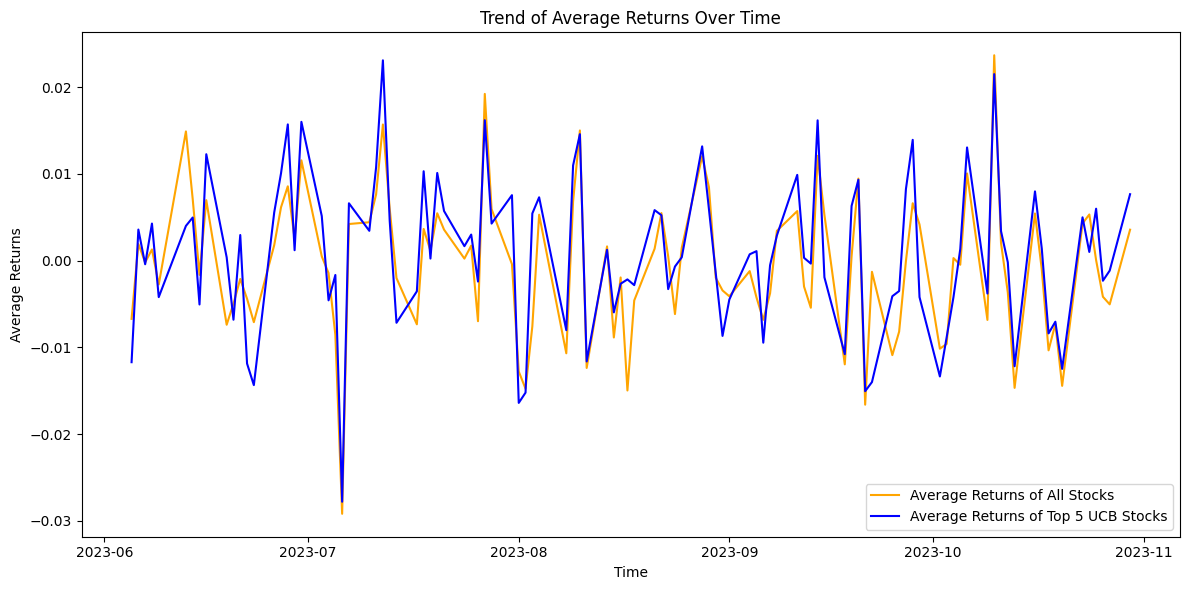

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average returns of all stocks at each time step
average_returns_all_times = returns_df.mean(axis=1)
# Calculate the average returns of the top 5 UCB stocks at each time step
average_returns_top_5_times = returns_df[top_stocks].mean(axis=1)

# Creating the plot
plt.figure(figsize=(12, 6))

# Plotting trend line for average returns of all stocks
plt.plot(average_returns_all_times, label='Average Returns of All Stocks', color='orange')

# Plotting trend line for average returns of top 5 UCB stocks
plt.plot(average_returns_top_5_times, label='Average Returns of Top 5 UCB Stocks', color='blue')

plt.title('Trend of Average Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Average Returns')
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import random

# Assuming returns_df is your dataframe with stock returns
pdata = returns_df.to_numpy()

# Parameters to integrate
NK = pdata.shape[1]  # Number of stocks, replacing n_stocks
EPSILON = 0.1  # Exploration rate, replacing epsilon
ALPHA = 0.85  # Learning rate, will be used in the update formula
NEPISODES = 1000  # Number of episodes, may be used if running multiple simulations
HOLD = 1  # Holding period for a stock, not used directly in epsilon-greedy
TMAX = pdata.shape[0] - HOLD  # Maximum time steps, replacing range(returns_df.shape[0])

# Initialize variables
average_reward = np.zeros(NK)  # Using NK instead of n_stocks
number_of_selections = np.zeros(NK)  # Using NK instead of n_stocks

# Epsilon-Greedy Algorithm with integrated parameters
for t in range(TMAX):  # Using TMAX instead of returns_df.shape[0]
    if random.random() < EPSILON:  # Using EPSILON instead of epsilon
        # Exploration: choose a random stock
        stock_selected = random.randint(0, NK - 1)
    else:
        # Exploitation: choose the best stock so far
        stock_selected = np.argmax(average_reward)

    # Update the number of selections and average reward
    number_of_selections[stock_selected] += 1
    reward = pdata[t, stock_selected]  # Using pdata to get the reward
    # Update formula using ALPHA
    average_reward[stock_selected] = (average_reward[stock_selected] * (number_of_selections[stock_selected] - 1) + ALPHA * reward) / number_of_selections[stock_selected]

# Identifying the top 5 stocks
top_stocks_epsilon_greedy_indices = np.argsort(number_of_selections)[-5:]
top_stocks_epsilon_greedy = returns_df.columns[top_stocks_epsilon_greedy_indices].tolist()

# Print the top stocks
print("Top 5 Stocks:", top_stocks_epsilon_greedy)


Top 5 Stocks: ['ISP.MI', 'AIR.PA', 'IFX.DE', 'AD.AS', 'ALV.DE']


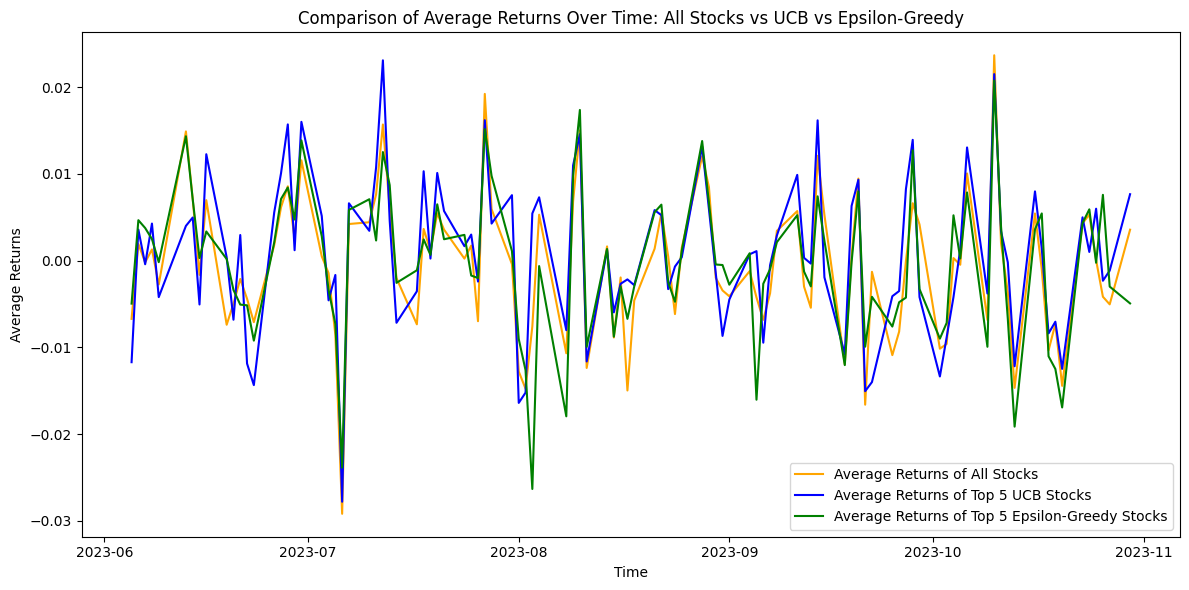

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average returns of all stocks at each time step
average_returns_all_times = returns_df.mean(axis=1)
# Calculate the average returns of the top 5 UCB stocks at each time step
average_returns_top_5_times = returns_df[top_stocks].mean(axis=1)
# Calculate the average returns of the top 5 stocks selected by the epsilon-greedy algorithm at each time step
average_returns_epsilon_greedy = returns_df[top_stocks_epsilon_greedy].mean(axis=1)

# Creating the plot
plt.figure(figsize=(12, 6))

# Plotting trend line for average returns of all stocks
plt.plot(average_returns_all_times, label='Average Returns of All Stocks', color='orange')

# Plotting trend line for average returns of top 5 UCB stocks
plt.plot(average_returns_top_5_times, label='Average Returns of Top 5 UCB Stocks', color='blue')

# Plotting trend line for average returns of top 5 epsilon-greedy stocks
plt.plot(average_returns_epsilon_greedy, label='Average Returns of Top 5 Epsilon-Greedy Stocks', color='green')

plt.title('Comparison of Average Returns Over Time: All Stocks vs UCB vs Epsilon-Greedy')
plt.xlabel('Time')
plt.ylabel('Average Returns')
plt.legend()
plt.tight_layout()

plt.show()


Hedging Strategy:
- Run a correlation matrix to identify the least correlated stocks with the portfolio of 5 optimum stocks.
- Select 3 these stocks as potential hedges.
- Implement a hedging strategy (e.g., using options, short positions, or other derivative instruments) to protect your portfolio from adverse market movements.


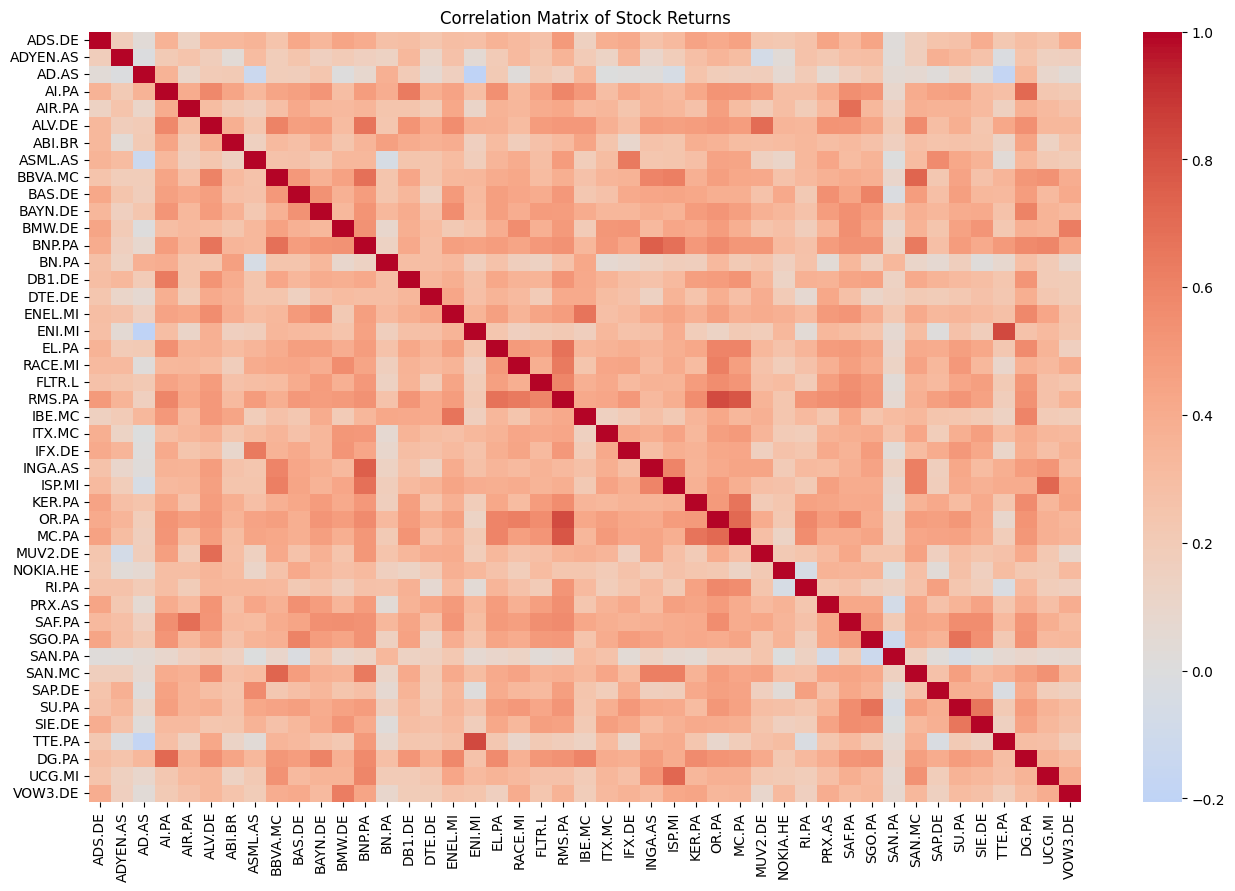

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
corr_matrix = returns_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Stock Returns')
plt.show()


In [ ]:
# returns_df is your dataframe with stock returns
# top_stocks contains the tickers of your 5 optimum stocks
optimum_portfolio = returns_df[top_stocks]

# Step 1: Calculate Correlation Matrix for the entire dataframe
correlation_matrix = returns_df.corr()

# Step 2: Calculate correlations of all stocks with the optimum portfolio
# We can average the correlations of each stock with the stocks in the optimum portfolio
portfolio_correlation = correlation_matrix[top_stocks].mean(axis=1)

# Step 3: Identify the least correlated stocks
# Sort the stocks by their average correlation with the portfolio and select the top 3 least correlated
least_correlated_stocks = portfolio_correlation.sort_values().head(3).index.tolist()

print("Potential hedging stocks:", least_correlated_stocks)


Potential hedging stocks: ['AD.AS', 'SAN.PA', 'ADYEN.AS']
